In [21]:
import requests
from bs4 import BeautifulSoup

In [73]:
url= "http://openapi.airkorea.or.kr/openapi/services/rest/ArpltnInforInqireSvc/getMsrstnAcctoRltmMesureDnsty?"
params= {
    "serviceKey": "%2B9FQLDiaKTKOIouuPYgTMqAJ36zj3HCMPue9QSPSGeUNcD%2FRVIcnDqCAh%2Bmrotj5DnzfC9tzRCMovkzFWKj3iA%3D%3D",
    "numOfRows": "10",
    "pageSize": "10",
    "pageNo": "1",
    "startPage": "1",
    "stationName": "%EC%A2%85%EB%A1%9C%EA%B5%AC",
    "dataTerm": "DAILY",
    "ver": "1.3"
}

In [176]:
def jiwon(url=url, params=params):
    for key, value in params.items():
        url+= key+ "="+ value+ "&"
    url= url[:len(url)-1]
    data= requests.get(url)
    doc= BeautifulSoup(data.text, "lxml")
    parsed= doc.findAll("item")
    timeList= [j.datatime.text for i, j in enumerate(parsed)]
    nameList= [j.mangname.text for i, j in enumerate(parsed)]
    so2List= [j.so2value.text for i, j in enumerate(parsed)]
    o3List= [j.o3value.text for i, j in enumerate(parsed)]
    coList= [j.covalue.text for i, j in enumerate(parsed)]
    no2List= [j.no2value.text for i, j in enumerate(parsed)]
    
    conn= sqlite3.connect("jiwon.db")
    with conn:
        cur= conn.cursor()
        for i, j in enumerate(parsed):
            cur.execute('insert into jiwon values (?, ?, ?, ?, ?, ?)', (timeList[i], nameList[i], so2List[i], o3List[i], coList[i], no2List[i]))

    return parsed

In [177]:
list= jiwon(url, params)

In [144]:
import sqlite3

스크린샷 2018-07-18 오전 10.07.07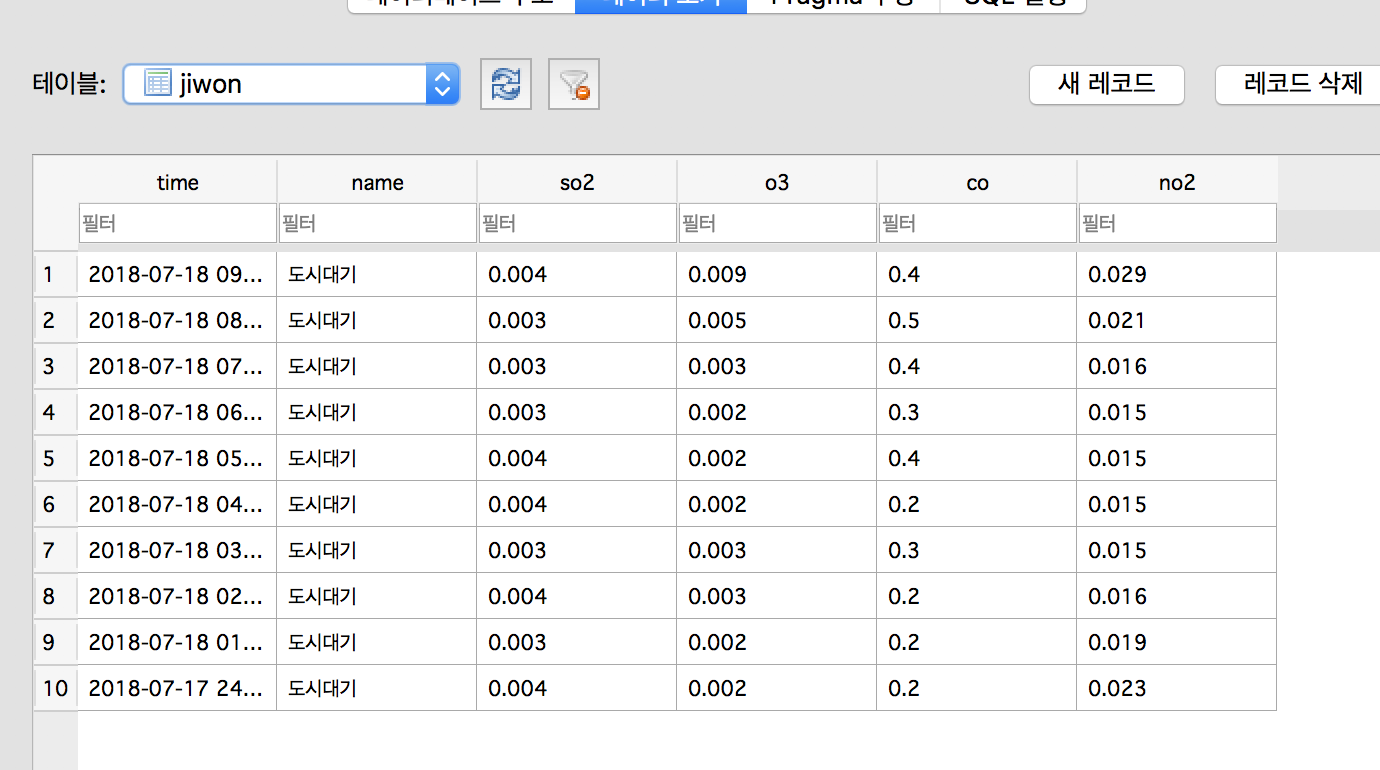